This cell creates a model and trains it on dummy data, this is not very interesting

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D


seq_length = 64

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 100))
y_train = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, y_train, epochs=10, batch_size=32)











Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7072 - acc: 0.5070
Epoch 2/10
1000/1000 [==============================] - 0s 54us/step - loss: 0.6954 - acc: 0.5160
Epoch 3/10
1000/1000 [==============================] - 0s 47us/step - loss: 0.6893 - acc: 0.5430
Epoch 4/10
1000/1000 [==============================] - 0s 49us/step - loss: 0.6878 - acc: 0.5520
Epoch 5/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6836 - acc: 0.5530
Epoch 6/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6810 - acc: 0.5600
Epoch 7/10
1000/1000 [==============================] - 0s 46us/step - loss: 0.6801 - acc: 0.5780
Epoch 8/10
1000/1000 [==============================] - 0s 49us/step - loss: 0.6735 - acc: 0.5760
Epoch 9/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6710 - acc: 0.5910
Epoch 10/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6692 - acc: 0.6010


This cell uses the model to make predictions on our data.

Then it iterates through the results and the real labels and compares them to check for False Positives(FP) and True Negatives(TN).

Then it uses the formula to calculate the False Positve Rate (FPR)

In [31]:
results = model.predict(x_train, batch_size=16)

false_positives = 0
true_positives = 0
total_negatives = 0
total_positives = 0
true_negatives = 0

for i in range(0,results.size):
    
    if results[i][0]>=0.5 and y_train[i]==0:
        false_positives += 1

    if results[i][0]>=0.5 and y_train[i]==1:
        true_positives += 1
        
    if results[i][0]<=0.5 and y_train[i]==0:
        true_negatives += 1
        
    if results[i][0] <= 0.5:
        total_negatives += 1
        
    if results[i][0] >= 0.5:
        total_positives += 1

false_discovery_rate = false_positives/(false_positives + true_negatives)
print(false_discovery_rate)





0.15180265654648956


ROC Curve


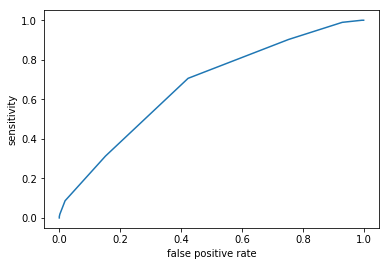

c-statistic = 0.6681463146535297


In [32]:

sensitivities = []
false_positive_rates =[]
discovery_percentage = 0.05

while discovery_percentage < 1.0:
    
    false_positives = 0
    true_positives = 0
    total_negatives = 0
    total_positives = 0
    true_negatives = 0
    
    for i in range(0,results.size):

        if results[i][0]>=discovery_percentage and y_train[i]==0:
            false_positives += 1

        if results[i][0]>=discovery_percentage and y_train[i]==1:
            true_positives += 1

        if results[i][0]<=discovery_percentage and y_train[i]==0:
            true_negatives += 1

        if y_train[i]==0:
            total_negatives += 1

        if y_train[i]==1:
            total_positives += 1
            
    if total_positives != 0 and total_negatives != 0:
        sensitivities.append(true_positives / total_positives)
        false_positive_rates.append(1-(true_negatives / total_negatives))
    
    discovery_percentage += 0.05
    
def trapezoid_area(b1,b2,h):
    return 0.5 * h * (b1 + b2)

riemann = 0.0
for i in range(0,len(sensitivities) - 1):
    riemann += 0.5 * (sensitivities[i]+sensitivities[i+1]) * (false_positive_rates[i]-false_positive_rates[i+1])
    

print("ROC Curve")
plt.plot(false_positive_rates, sensitivities )
plt.ylabel('sensitivity')
plt.xlabel('false positive rate')
plt.show()
print("c-statistic = " + str(riemann))